In [1]:
import numpy as np
import cv2
from matplotlib import __version__ as plt_version
import matplotlib.pyplot as plt
import sys
import os
os.chdir("../")
print("cwd", os.getcwd())
from importlib import reload
import Saxs2dProfile as s2p
import Saxs1dProfile as s1p
import XafsData as xd
import util

print("python", sys.version_info)
print("numpy", np.__version__)
print("cv2", cv2.__version__) # type: ignore
print("matplotlib", plt_version) # type: ignore

cwd /Users/jun/codes/SpectraSpark
python sys.version_info(major=3, minor=10, micro=13, releaselevel='final', serial=0)
numpy 1.25.2
cv2 4.8.0
matplotlib 3.7.2


In [16]:
reload(s2p)
reload(s1p)
reload(xd)
reload(util)
print(s2p.__version__)
print(s1p.__version__)
print(xd.__version__)
print(util.__version__)

0.0.26
0.0.15
0.1.0
0.0.1


In [17]:
s202_isoA02_001 = s1p.DafsData("testdata/s202/XAFSisoA02/001", "../isoA02_001.dat", xafscols={4:"i0", 5:"tr", 6:"fl"})
s202_isoA02_001.loadStdinfo("../../Static/stdinfo.csv")
s202_isoA02_001.loadFiles()

Saxs1dProfile [INFO]: loaded 481 files from /Users/jun/codes/SpectraSpark/testdata/s202/XAFSisoA02/001 from Saxs1dProfile.py:90
Saxs1dProfile [INFO]: loaded 481 files from /Users/jun/codes/SpectraSpark/testdata/s202/XAFSisoA02/001 from Saxs1dProfile.py:90
Saxs1dProfile [INFO]: loaded 481 files from /Users/jun/codes/SpectraSpark/testdata/s202/XAFSisoA02/001 from Saxs1dProfile.py:90
Saxs1dProfile [INFO]: loaded 481 files from /Users/jun/codes/SpectraSpark/testdata/s202/XAFSisoA02/001 from Saxs1dProfile.py:90
Saxs1dProfile [INFO]: loaded 481 files from /Users/jun/codes/SpectraSpark/testdata/s202/XAFSisoA02/001 from Saxs1dProfile.py:90
Saxs1dProfile [INFO]: loaded 481 files from /Users/jun/codes/SpectraSpark/testdata/s202/XAFSisoA02/001 from Saxs1dProfile.py:90
Saxs1dProfile [INFO]: loaded 481 files from /Users/jun/codes/SpectraSpark/testdata/s202/XAFSisoA02/001 from Saxs1dProfile.py:90


In [18]:
print(s202_isoA02_001.r2q(400,9200))
print(s202_isoA02_001.q2r(3.9,9200))

3.9004432158158906
399.9546268084243


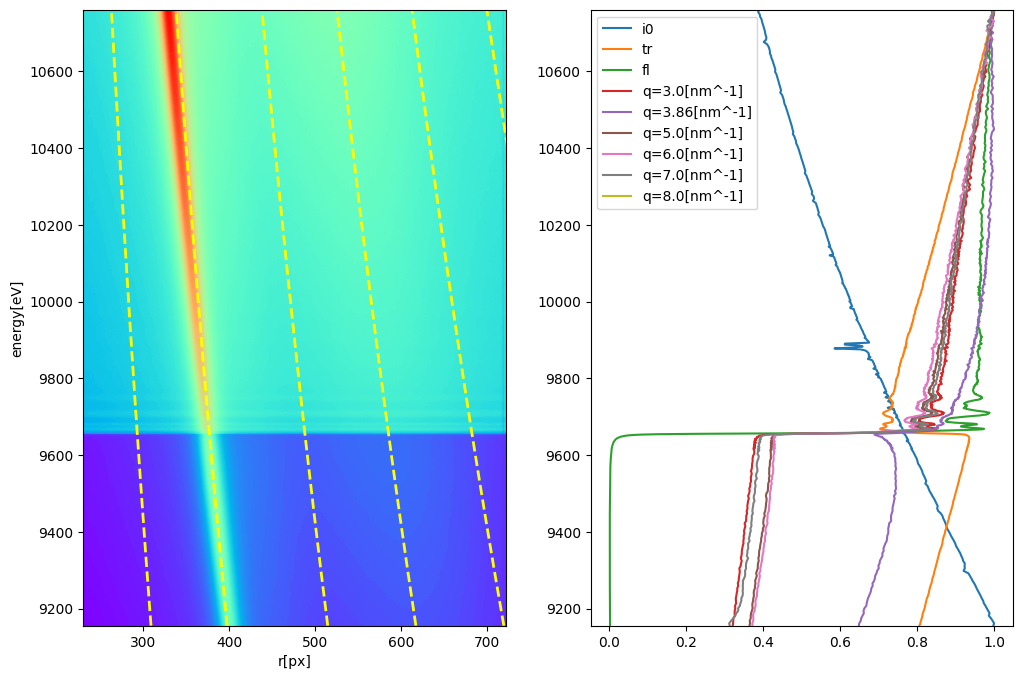

In [19]:
q = np.array([3.0, 3.86, 5, 6, 7, 8])

fig, axs = plt.subplots(1,2,figsize=(12,8))
ax = axs[0]
ax = s202_isoA02_001.heatmap(ax, levels=200)

for qi in q:
    _q = np.full_like(s202_isoA02_001.energy, qi)
    _r = s202_isoA02_001.q2r(_q, s202_isoA02_001.energy)
    ax.plot(
        _r,s202_isoA02_001.energy, label=f"q={qi}[nm^-1]", color="yellow", linewidth=2,
        linestyle="dashed"
    )
ax.set_xlim(s202_isoA02_001.r[0], s202_isoA02_001.r[-1])

ax = axs[1]
_tr = s202_isoA02_001.xafsfile.data["tr"] / s202_isoA02_001.i0
_fl = s202_isoA02_001.xafsfile.data["fl"] / s202_isoA02_001.i0
ax.plot(s202_isoA02_001.i0/s202_isoA02_001.i0.max(), s202_isoA02_001.energy, label="i0")
ax.plot(_tr/_tr.max(), s202_isoA02_001.energy, label="tr")
ax.plot(_fl/_fl.max(), s202_isoA02_001.energy, label="fl")
for qi in q:
    _i = s202_isoA02_001.q_slice(qi)
    _i = _i / _i.max()
    ax.plot(
        _i, s202_isoA02_001.energy, label=f"q={qi}[nm^-1]"
    )
ax.legend()

for ax in axs:
    ax.set_ylim(s202_isoA02_001.energy[0], s202_isoA02_001.energy[-1])

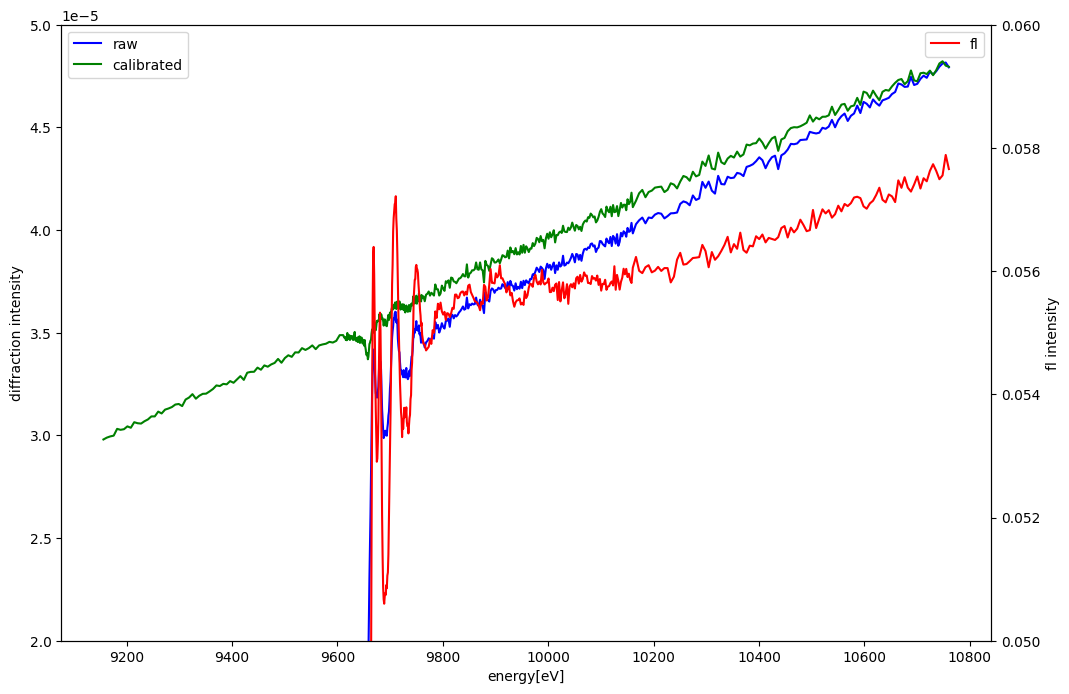

In [33]:
q = 3
diffraction = s202_isoA02_001.q_slice(q)
fl = s202_isoA02_001.xafsfile.data["fl"] / s202_isoA02_001.i0
calibrated = diffraction - fl*0.78e-3

fig, ax1 = plt.subplots(1,1,figsize=(12,8))
ax1.plot(s202_isoA02_001.energy, diffraction-4.5e-5, label="raw", color="blue")
ax1.plot(s202_isoA02_001.energy, calibrated, label="calibrated", color="green")
ax2 = ax1.twinx()
ax2.plot(s202_isoA02_001.energy, fl, label="fl", color="red")
ax1.set_xlabel("energy[eV]")
ax1.set_ylim(2e-5,5e-5)
ax1.set_ylabel("diffraction intensity")
ax2.set_ylabel("fl intensity")
ax2.set_ylim(5e-2,6e-2)
ax1.legend()
ax2.legend()